In [1]:
import sys
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Get the absolute path of the project root (modify if needed)
project_root = os.path.abspath(r"C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction")

# Add the project root to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar el módulo
from src import visualizations

# Recargar el módulo después de modificarlo
importlib.reload(visualizations)

# Ahora puedes volver a usar las funciones actualizadas
from src.visualizations import plot_distribution_by_category,plot_correlation_by_category
from src.tools import categorizar_tipos_basicos, categorizar_tipos_detallados, crosstab_percentages

In [2]:
path_data="..//data/1/Loan Prediction.csv"
df=pd.read_csv(path_data)
# Convert Risk_Flag to categorical 1 = Hogh Risk, 0 = Low Risk
df['Risk_Flag'] = df['Risk_Flag'].astype('category')
df['Risk_Flag'] = df['Risk_Flag'].cat.rename_categories({1: 'High Risk', 0: 'Low Risk'})
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,Low Risk
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,Low Risk
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,Low Risk
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,High Risk
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,High Risk


Descriptive Statistics for Numerical Columns:
                   Id        Income            Age     Experience  \
count  252000.000000  2.520000e+05  252000.000000  252000.000000   
mean   126000.500000  4.997117e+06      49.954071      10.084437   
std     72746.278255  2.878311e+06      17.063855       6.002590   
min         1.000000  1.031000e+04      21.000000       0.000000   
25%     63000.750000  2.503015e+06      35.000000       5.000000   
50%    126000.500000  5.000694e+06      50.000000      10.000000   
75%    189000.250000  7.477502e+06      65.000000      15.000000   
max    252000.000000  9.999938e+06      79.000000      20.000000   

       CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  
count    252000.000000      252000.000000  
mean          6.333877          11.997794  
std           3.647053           1.399037  
min           0.000000          10.000000  
25%           3.000000          11.000000  
50%           6.000000          12.000000  
75%           9.000000          

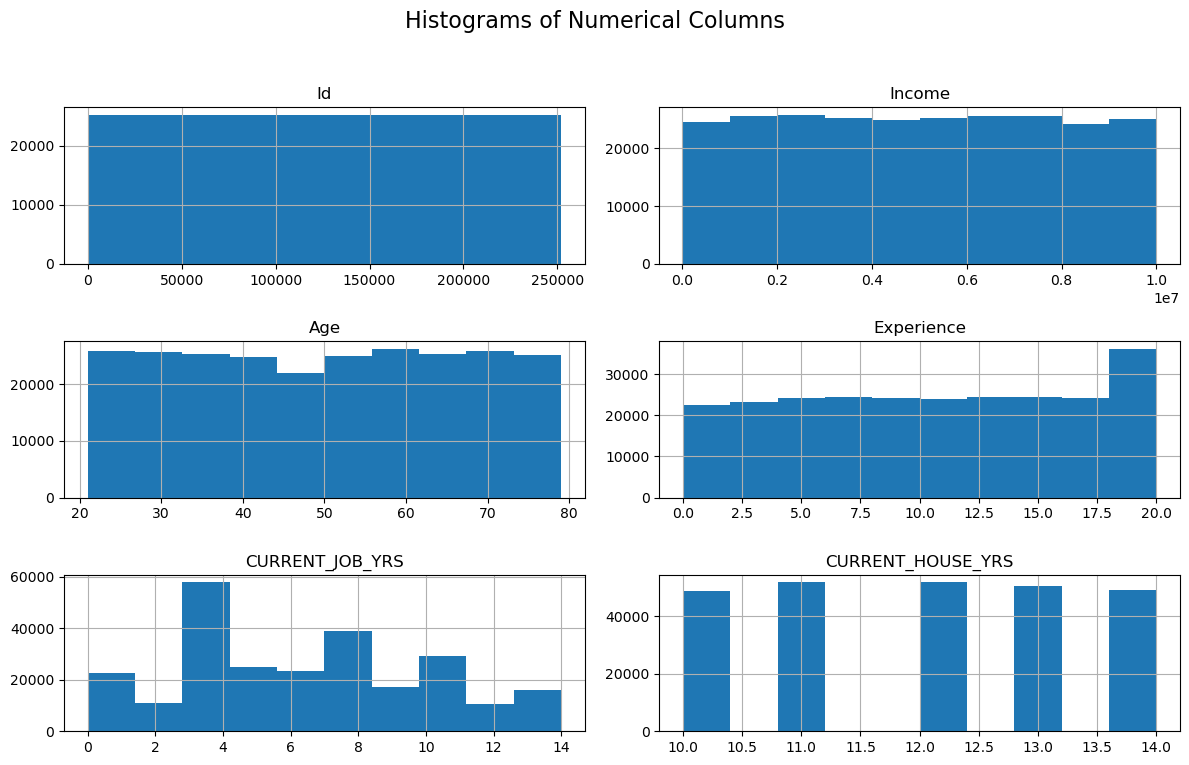

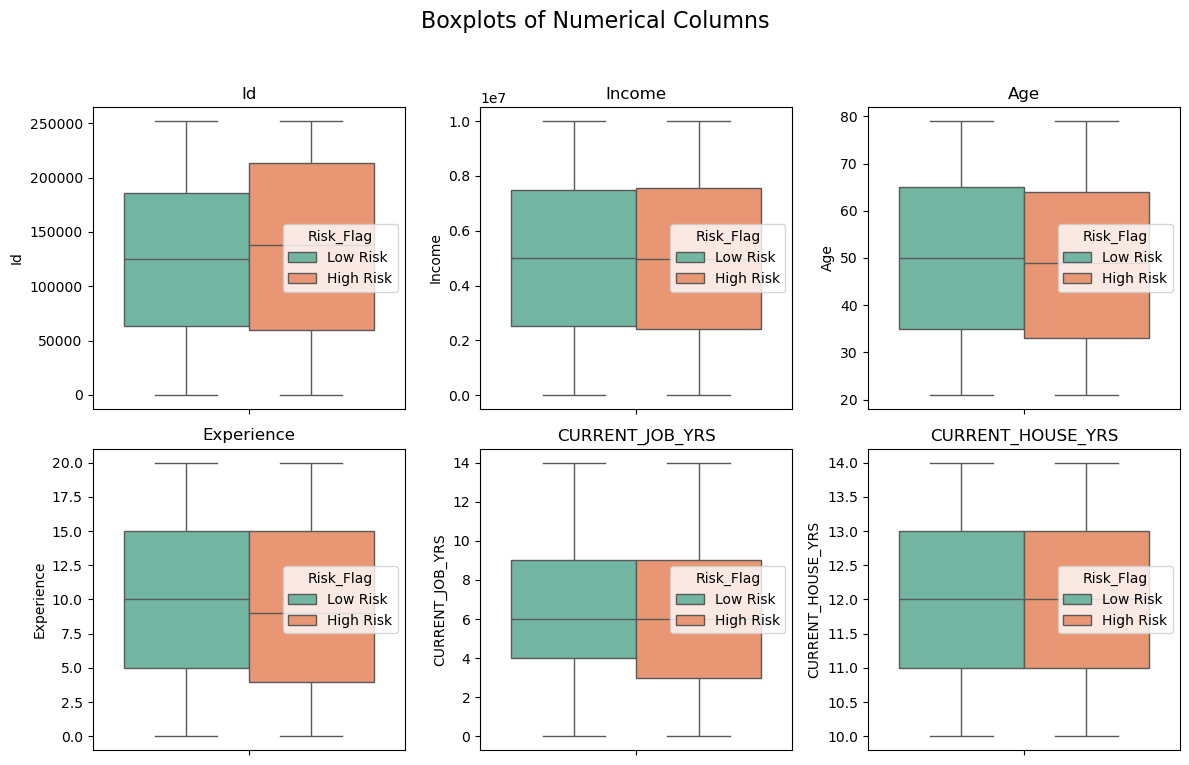

In [17]:
# --- Numerical Features ---

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Basic descriptive statistics
numerical_desc = df[numerical_cols].describe()
print("Descriptive Statistics for Numerical Columns:\n", numerical_desc)

# Histograms for numerical columns
df[numerical_cols].hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Boxplots for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], hue=df['Risk_Flag'], palette='Set2')
    plt.title(col)
plt.suptitle("Boxplots of Numerical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

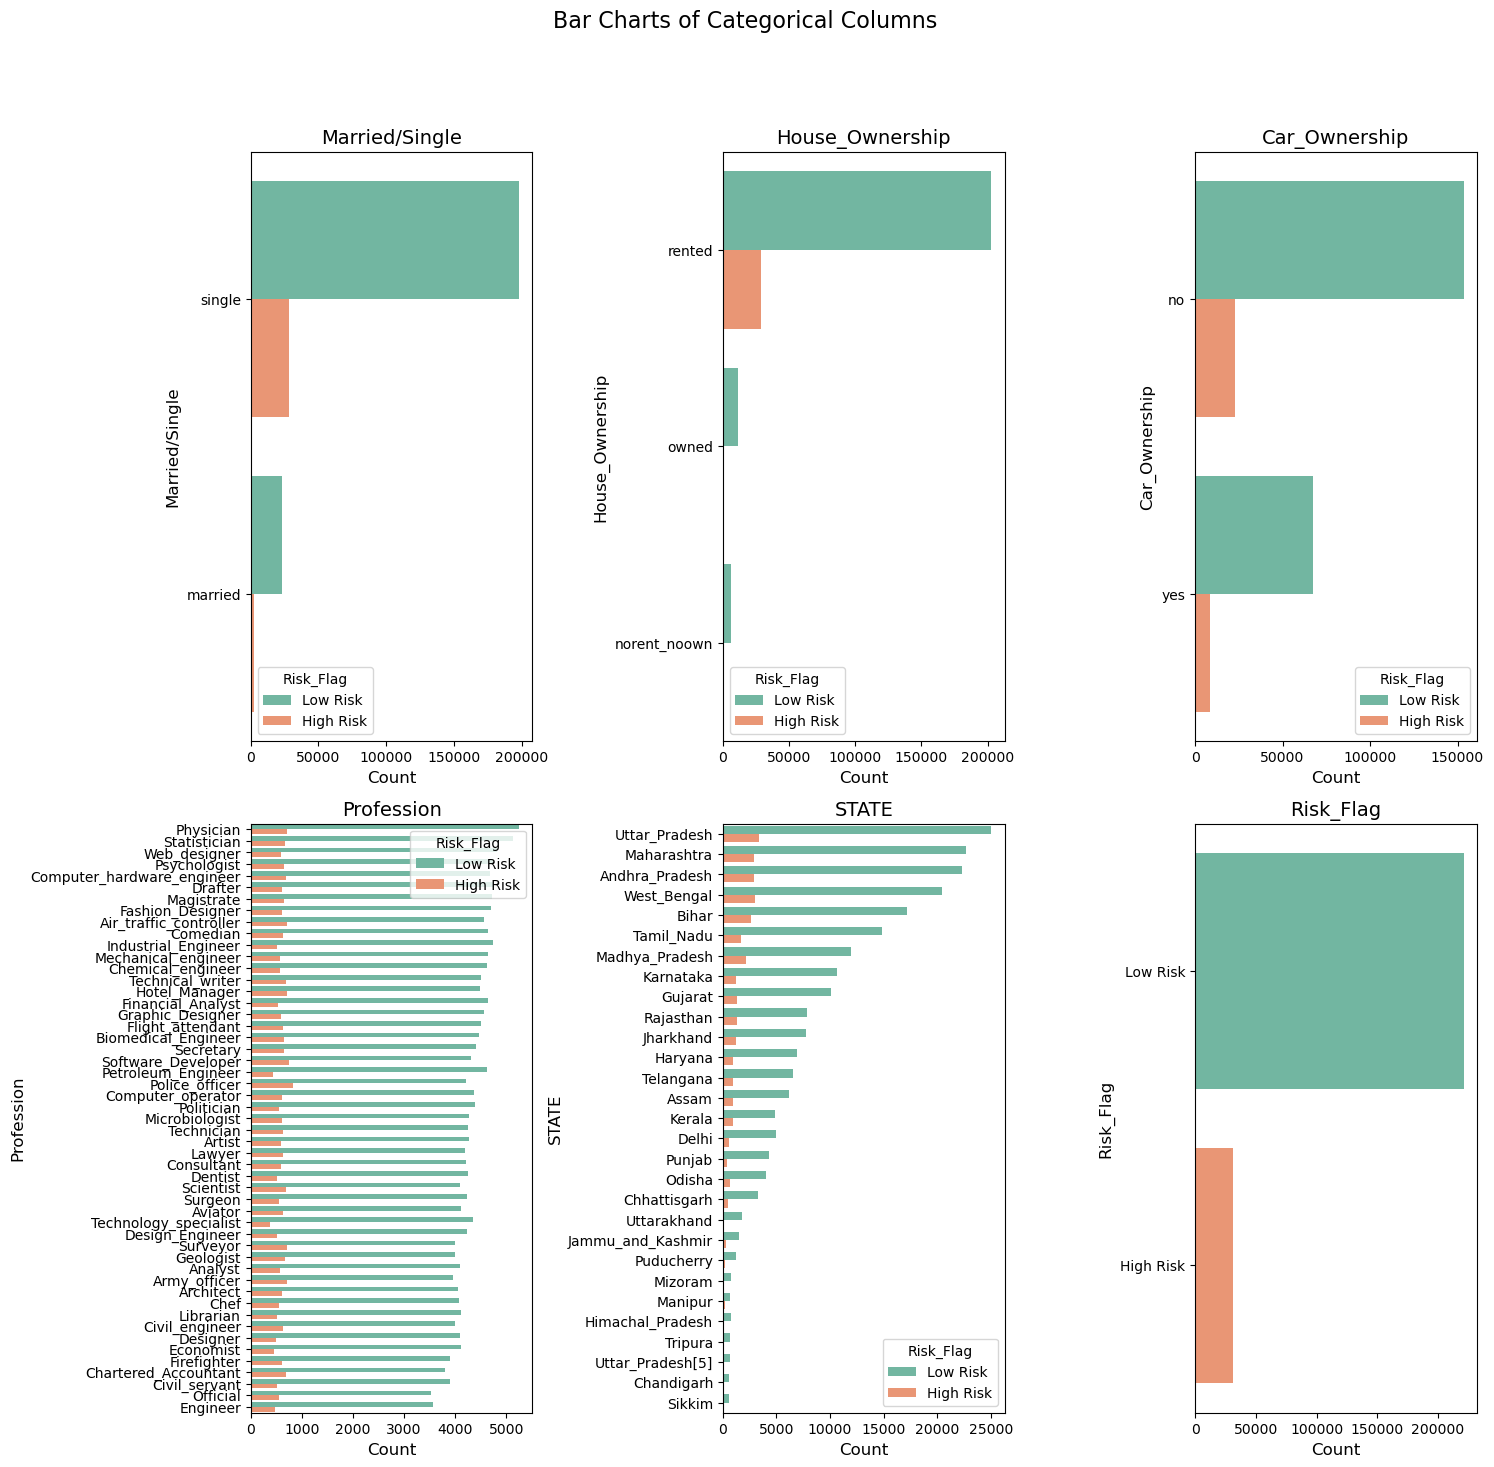

In [25]:
categorical_cols = df.drop(columns=["CITY"]).select_dtypes(include=['object', 'category']).columns

# Bar charts for categorical columns
plt.figure(figsize=(15, 22))  # Increased height while keeping width the same
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)  # Keeps the original grid layout
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df['Risk_Flag'], palette='Set2')
    plt.title(col, fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.xlabel("Count", fontsize=12)

plt.suptitle("Bar Charts of Categorical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


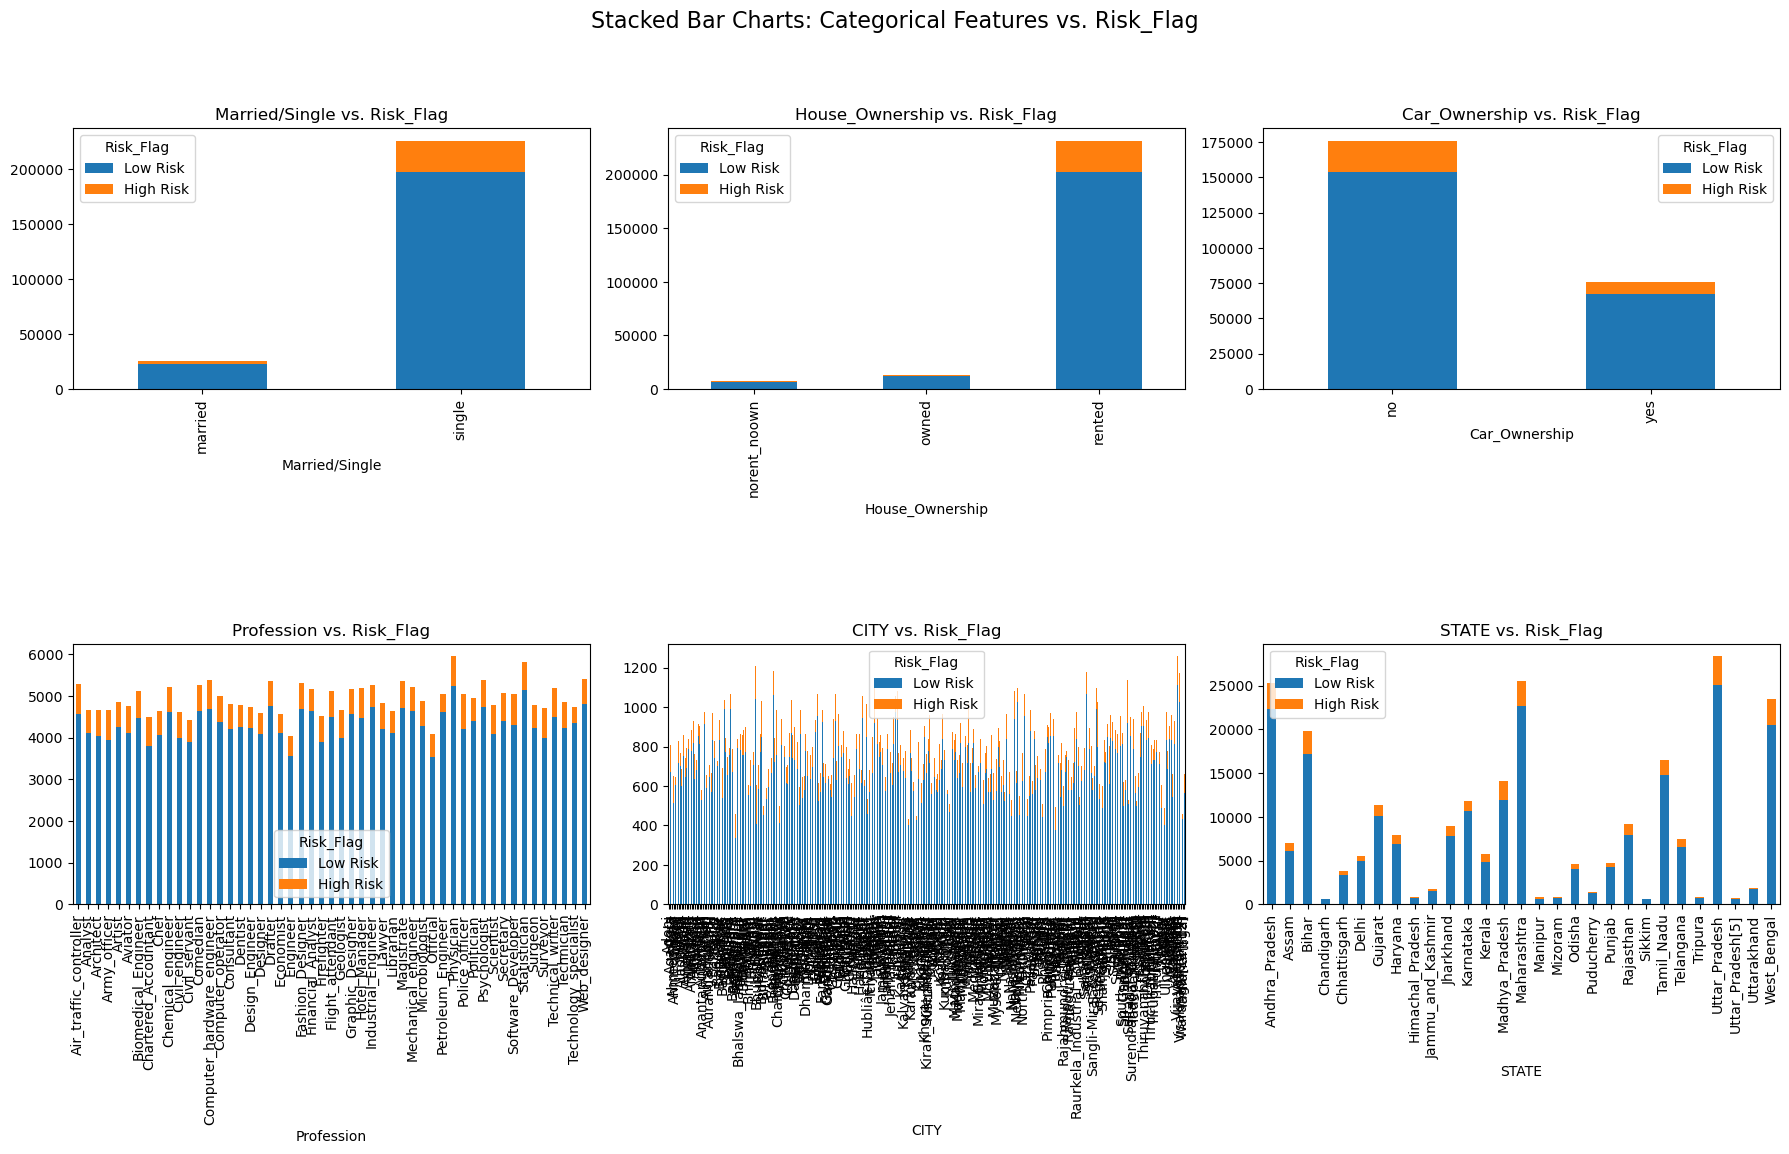

In [10]:
# --- Relationship with Risk_Flag ---

categorical_cols_no_risk = [col for col in categorical_cols if col != 'Risk_Flag']
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols_no_risk):
    plt.subplot(3, 3, i + 1)
    ct = pd.crosstab(df[col], df['Risk_Flag'])
    ct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs. Risk_Flag')
plt.suptitle("Stacked Bar Charts: Categorical Features vs. Risk_Flag", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()